In [5]:
import numpy as np

In [12]:
class encoder:
    def __init__(self ,video ,  mb_size = 16 ):
        self.iframe = video[0]
        self.pframes = video[1:]
        self.mb_size = mb_size

    def blocking(self, im , blockSize):
        blocks = []
        for i in range(blockSize , im.shape[0]+1 ,blockSize):
            for j in range(blockSize ,im.shape[1]+1 , blockSize):
                B = im[i-blockSize:i , j-blockSize:j]
                blocks.append(B)

        blocks = np.array(blocks)
        return blocks


    def rgb2ycbcr(self , im):
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128
        return np.uint8(ycbcr)




    def iframe_coding(self):
        mbs = self.blocking(self.iframe , 16)
        for i in mbs:





In [ ]:
class decoder:
    def __init__(self):
        print('hi')

    def func1(self):
        print('hi')

    def ycbcr2rgb(im):
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
        rgb = im.astype(np.float)
        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)
        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)
        return np.uint8(rgb)

In [3]:
import skvideo as vi
import skvideo.io
import skvideo.motion
import skvideo.measure
import skvideo.datasets
import matplotlib.pyplot as plt


raw_suzie = vi.io.vread("suzie_qcif.y4m",as_grey=False)

print(raw_suzie.shape)

(150, 144, 176, 3)


In [13]:
enc = encoder(raw_suzie  , 16)

a = enc.rgb2ycbcr(raw_suzie[0])

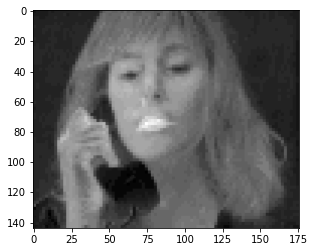

In [18]:
plt.imshow(a[2], cmap="gray")